In [30]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data

In [6]:
df= pd.read_csv("chidata_for_assignment.csv")
df.head(10)

,Gender,Insurance
0,Male,Insurance
1,Female,No_Insurance
2,Male,Insurance
3,Female,No_Insurance
4,Male,Insurance
5,Male,Insurance
6,Male,Insurance
7,Male,Insurance
8,Male,Insurance
9,Male,Insurance


In [4]:
# display column names
for cols in df.columns:
    print(cols)

Gender
Insurance


In [5]:
#display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
Gender       49 non-null object
Insurance    49 non-null object
dtypes: object(2)
memory usage: 864.0+ bytes


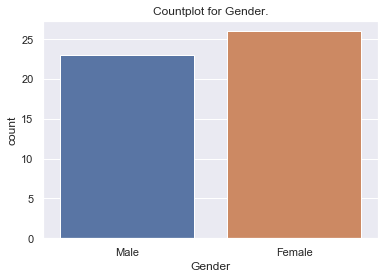

In [10]:
#countplot of gender
sns.set(style="darkgrid")
sns.countplot(x='Gender', data=df)
plt.title('Countplot for Gender.')
plt.show()

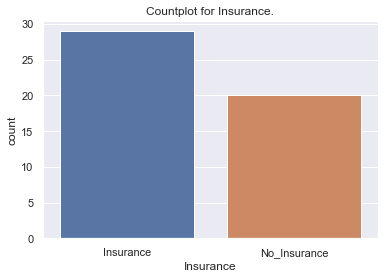

In [11]:
#insurance countplot
sns.set(style='darkgrid')
sns.countplot(x='Insurance', data=df)
plt.title('Countplot for Insurance.')
plt.show()

In [27]:
#Contingency cross table
cm=pd.crosstab(df.Gender, df.Insurance, margins=True, margins_name="Total")
cm

Insurance,Insurance,No_Insurance,Total
Gender,,,
Female,9,17,26
Male,20,3,23
Total,29,20,49


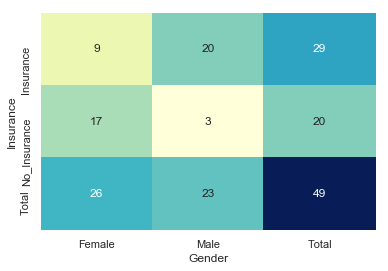

In [34]:
#heatmap for the contingency cross table
res= sns.heatmap(cm.T, annot=True, cmap="YlGnBu", cbar=False)

In [28]:
# significance level
alpha = 0.05
# Calcualtion of Chisquare test statistics
chi_square = 0
rows = df['Gender'].unique()
columns = df['Insurance'].unique()
for i in columns:
    for j in rows:
        O = cm[i][j]
        E = cm[i]['Total'] * cm['Total'][j] / cm['Total']['Total']
        chi_square += (O-E)**2/E

In [31]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 13.840621035636032  and p value is: 0.0
Null Hypothesis is rejected.


In [32]:
# The critical value approach

print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 13.840621035636032  and p value is: 3.841458820694124
Null Hypothesis is rejected.
